In [14]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns
import os

In [3]:
bb_file = r'/Users/allankapoor/Documents/Springboard/NOAA_Harvey/boundingboxes-all-damagearea-pixelcoords/boundingboxes-all-damagearea-pixelcoords.shp'

In [5]:
bbs = gpd.read_file(bb_file)

In [6]:
bbs.head()

,id,damageleve,image,bb,geometry
0,410053,AFF,20170901/20170901aC0935700w295530n_2_2.tif,"(1254, 178, 1294, 212)","POLYGON ((-93.93230 29.91292, -93.93230 29.913..."
1,410054,none,20170901/20170901aC0935700w295400n_3_2.tif,"(1255, 428, 1410, 555)","POLYGON ((-93.93230 29.87503, -93.93230 29.875..."
2,410055,MIN,20170901/20170901aC0935700w295400n_1_2.tif,"(1256, 1826, 1300, 1863)","POLYGON ((-93.93229 29.89006, -93.93229 29.890..."
3,410056,MIN,20170901/20170901aC0935700w295400n_1_2.tif,"(1255, 685, 1291, 718)","POLYGON ((-93.93229 29.89623, -93.93229 29.896..."
4,410057,MIN,20170901/20170901aC0935700w295400n_1_2.tif,"(1257, 1076, 1284, 1098)","POLYGON ((-93.93228 29.89418, -93.93228 29.894..."


In [7]:
bbs.image.nunique()

3895

In [8]:
bbs[bbs.image=='20170901/20170901aC0935700w295530n_2_2.tif']

,id,damageleve,image,bb,geometry
0,410053,AFF,20170901/20170901aC0935700w295530n_2_2.tif,"(1254, 178, 1294, 212)","POLYGON ((-93.93230 29.91292, -93.93230 29.913..."
5,410058,MIN,20170901/20170901aC0935700w295530n_2_2.tif,"(1257, 1690, 1286, 1714)","POLYGON ((-93.93228 29.90482, -93.93228 29.904..."
6,410059,MIN,20170901/20170901aC0935700w295530n_2_2.tif,"(1257, 1032, 1293, 1071)","POLYGON ((-93.93228 29.90828, -93.93228 29.908..."
7,410060,MIN,20170901/20170901aC0935700w295530n_2_2.tif,"(1257, 954, 1296, 987)","POLYGON ((-93.93228 29.90874, -93.93228 29.908..."
10,410063,MIN,20170901/20170901aC0935700w295530n_2_2.tif,"(1259, 1704, 1306, 1744)","POLYGON ((-93.93227 29.90466, -93.93227 29.904..."
...,...,...,...,...,...
566649,410042,AFF,20170901/20170901aC0935700w295530n_2_2.tif,"(1246, 481, 1287, 518)","POLYGON ((-93.93234 29.91127, -93.93234 29.911..."
566654,410047,AFF,20170901/20170901aC0935700w295530n_2_2.tif,"(1250, 1864, 1279, 1889)","POLYGON ((-93.93232 29.90388, -93.93232 29.904..."
566655,410048,MIN,20170901/20170901aC0935700w295530n_2_2.tif,"(1250, 1384, 1281, 1410)","POLYGON ((-93.93232 29.90646, -93.93232 29.906..."
566657,410050,MIN,20170901/20170901aC0935700w295530n_2_2.tif,"(1252, 1262, 1281, 1288)","POLYGON ((-93.93231 29.90712, -93.93231 29.907..."


In [21]:
num_imgs = bbs.groupby('image').count().reset_index()

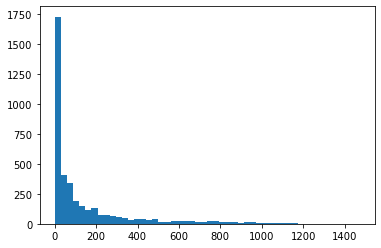

In [22]:
plt.hist(num_imgs.bb, bins=50);

In [23]:
num_imgs.bb.describe()

count    3895.000000
mean      145.483954
std       228.840968
min         1.000000
25%         9.000000
50%        43.000000
75%       176.500000
max      1471.000000
Name: bb, dtype: float64

In [26]:
num_imgs[num_imgs.bb == num_imgs.bb.max()]

,image,id,damageleve,bb,geometry
308,20170830/20170830aC0952400w294800n_2_2.tif,1471,1471,1471,1471
1028,20170831/20170831aC0952400w294800n_2_2.tif,1471,1471,1471,1471


In [29]:
tile_folder = r'/Users/allankapoor/Documents/Springboard/NOAA_Harvey/image_tiles/1'

In [30]:
tile_list = os.listdir(tile_folder)

In [31]:
len(tile_list)

33561

In [33]:
tile_list[0:10]

['20170902bC0950130w291630n_1_2.tif',
 '20170902aC0940130w301500n_1_2.tif',
 '20170901cC0934330w302100n_2_3.tif',
 '20170827aC0971330w261630n_3_3.tif',
 '20170831aC0950730w295530n_3_1.tif',
 '20170828bC0970130w280130n_3_3.tif',
 '20170903aC0954500w293900n_1_3.tif',
 '20170902aC0935100w300130n_2_2.tif',
 '20170902cC0950000w295400n_2_3.tif',
 '20170902bC0943130w293300n_1_3.tif']

In [36]:
tiles_df = pd.DataFrame(tile_list, columns=['filename'])

In [38]:
tiles_df['has_structures'] = False

In [39]:
tiles_df

,filename,has_structures
0,20170902bC0950130w291630n_1_2.tif,False
1,20170902aC0940130w301500n_1_2.tif,False
2,20170901cC0934330w302100n_2_3.tif,False
3,20170827aC0971330w261630n_3_3.tif,False
4,20170831aC0950730w295530n_3_1.tif,False
...,...,...
33556,20170829bC0970900w280300n_1_2.tif,False
33557,20170902bC0941500w294030n_3_3.tif,False
33558,20170903aC0945700w293600n_3_1.tif,False
33559,20170830aC0954030w295400n_1_2.tif,False


In [46]:
def check_for_structures(row):
    if row['filename'] in list(num_imgs.image):
        return True
    else:
        return False

In [47]:
tiles_df.has_structures = tiles_df.apply((lambda row: check_for_structures(row)), axis=1)

In [48]:
tiles_df.has_structures.sum()

0

In [49]:
list(num_imgs.image)

['20170827/20170827aC0971330w273600n_1_1.tif',
 '20170827/20170827aC0971330w273730n_1_1.tif',
 '20170827/20170827aC0971330w273730n_2_1.tif',
 '20170827/20170827aC0971330w273730n_3_1.tif',
 '20170827/20170827aC0971500w273600n_1_1.tif',
 '20170827/20170827aC0971500w273600n_1_2.tif',
 '20170827/20170827aC0971500w273600n_1_3.tif',
 '20170827/20170827aC0971500w273600n_2_2.tif',
 '20170827/20170827aC0971500w273600n_2_3.tif',
 '20170828/20170828bC0970130w280730n_3_1.tif',
 '20170828/20170828bC0970130w280900n_1_2.tif',
 '20170828/20170828bC0970130w280900n_2_2.tif',
 '20170828/20170828bC0970130w280900n_2_3.tif',
 '20170828/20170828bC0970300w280300n_1_2.tif',
 '20170828/20170828bC0970300w280300n_1_3.tif',
 '20170828/20170828bC0970300w280300n_2_2.tif',
 '20170828/20170828bC0970300w280300n_2_3.tif',
 '20170828/20170828bC0970300w280430n_1_2.tif',
 '20170828/20170828bC0970300w280430n_2_2.tif',
 '20170828/20170828bC0970300w280430n_3_2.tif',
 '20170828/20170828bC0970300w280600n_1_1.tif',
 '20170828/20

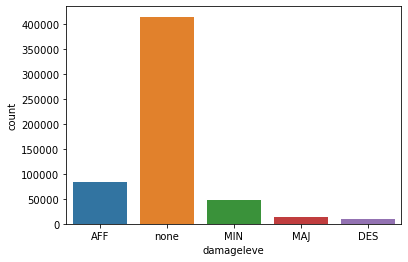

In [53]:
sns.countplot(x=bbs.damageleve);

In [55]:
def show_image(image, title='image', cmap_type='grey'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [58]:
from skimage import io

In [ ]:
#what to the bounding box numbers correspond to?

In [59]:
#get one tile

test_tile_path = '/Users/allankapoor/Documents/Springboard/NOAA_Harvey/image_tiles/1/20170830aC0953730w294800n_2_1.tif'


test_tile = io.imread(test_tile_path)

#get coordinates of one bounding box

In [ ]:
bb = (984, 1496, 1217, 1817)
#.    TLx.  TLy. BRx.  BRy.    

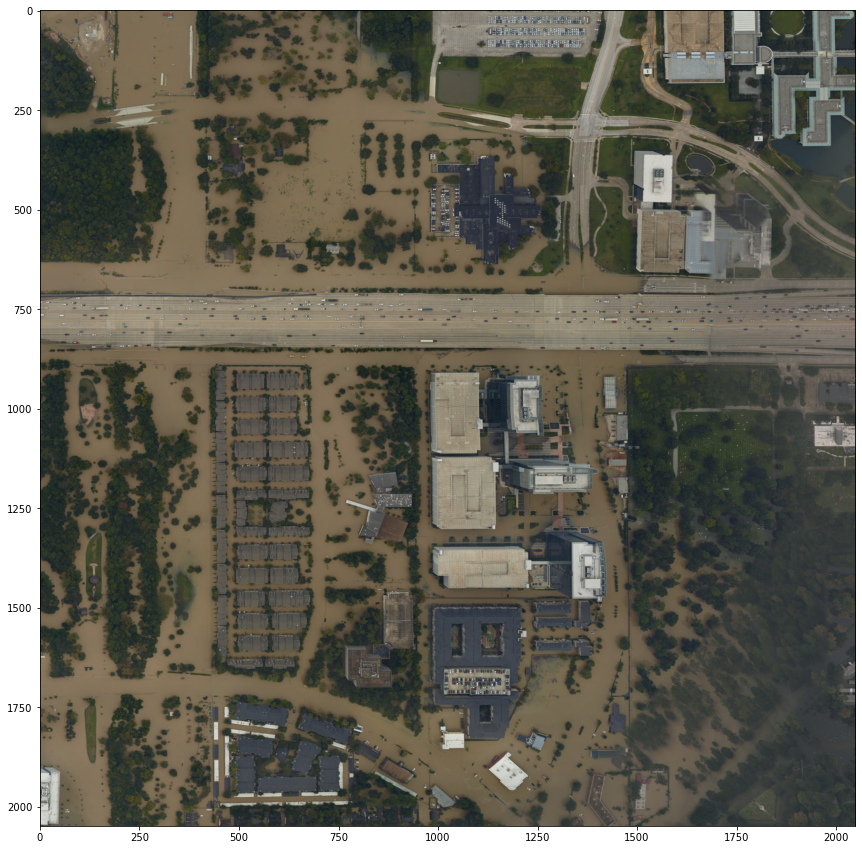

In [67]:
plt.figure(figsize=(15,15))
plt.imshow(test_tile)



In [ ]:
#calculate areas of bounding boxes

#figure out what an upper and lower limit limit should be (want to select SF homes but not big buildings or sheds)

#identify which buildings actually have satellite imagery
    #indetify subset of tiles that have buildings
    #of those, figure out which of those have a bunch of no data?
    #tag buildings that are within images that have data
    #filter for buildings within size threshold - this is group training set can come from
    
#randomly select a subset (equall distribution of classes)

In [ ]:
#ML TO DO



#set up a basic keras model and train


#use a transfer learning model and train